In [33]:
import numpy as np
import time

In [34]:
# CONSTANTS
NO_METERS_P = 108
NO_POLES_P = 117
NO_METERS_C = 7172
NO_POLES_C = 6550

In [35]:
# ask user whether cap360 or phase1
#          whether preprocessing or not

In [36]:
data_file = np.loadtxt('cap360.txt', dtype=np.int32)
#data_file = np.loadtxt('phase1.txt', dtype=np.int32)

In [ ]:
# Create an adjacency matrix of poles and meters
Adj_pm = np.zeros((NO_POLES_P, NO_METERS_P))
# Create an adjacency list for each pole
poles = [[] for i in range(NO_POLES_P)]
# Create an adjacency list for each meter
meters = [[] for i in range(NO_METERS_P)]


In [25]:
# Create an adjacency matrix of poles and meters
Adj_pm = np.zeros((NO_POLES_C, NO_METERS_C))
# Create an adjacency list for each pole
poles = [[] for i in range(NO_POLES_C+1)]
# Create an adjacency list for each meter
meters = [[] for i in range(NO_METERS_C+1)]


In [26]:
for x in data_file:
    if (x[1]-1 < 0):
        print("sime")
        print(x)
    #x[0] -= 1 # Converting to 0-index
    #x[1] -= 1
    #Adj_pm[x[1]][x[0]] = 1
    #meters[x[0]].append(x[1])
    poles[x[1]].append(x[0])

In [32]:
with open("testdatafile", "w") as f:
    for i in range(NO_POLES_C + 1):
        for j in range(len(poles[i])):
            if (j == len(poles[j]) - 1):
                print(poles[i][j], end = "\n", file = f)
            else:
                print(poles[i][j], end = " ", file = f)
        #print("\n", file =f)


In [ ]:
start_time = time.time()
sorted_array = np.argsort([len(x) for x in poles])[::-1]
# Create an empty for covered meters
cov_meters = np.zeros(NO_METERS_C)
# list of covered meters
list_cov_meters = []
# list of covering poles
list_cov_poles = []
j = 0
while (np.any(cov_meters == 0)):
#for j in range(len(sorted_array)):
    best_pole = sorted_array[j] # best pole by length
    list_cov_poles.append(best_pole)
    for x in (poles[best_pole]):
        cov_meters[x] += 1
        #if x not in list_cov_meters:
         #   list_cov_meters.append(x)
    #j += 1
    # Clean up
    for i in range(0, len(list_cov_poles), 1): # for each already selected pole(sp)
        if (i >= len(list_cov_poles)):
            break
        sp = list_cov_poles[i]
        cleanable = True
        for x in (poles[sp]):
            if ((cov_meters[x] - 1) == 0):
                cleanable = False
                break
        if (cleanable):
            list_cov_poles.remove(sp)
            #print("\nremoving ", sp)
            for x in (poles[sp]):
                cov_meters[x] -= 1
                #print(x, "   ", cov_meters[x])
           #print("----------------------")
print((time.time() - start_time))
print(len(list_cov_poles))
print(list_cov_poles)

In [ ]:
%%time 
for i in range(8000):
    x = (Adj_pm[:, np.argsort(np.sum(Adj_pm, axis=0))].sum(axis=0))


### Matrix based solution

In [ ]:
data_file = np.loadtxt('cap360.txt', dtype=np.int32)
# Create a meters x poles matrix
Adj_pm = np.zeros((NO_METERS_C, NO_POLES_C))
# another modifiable matrix 
Mod_adj_pm = np.zeros((NO_METERS_C, NO_POLES_C))
for x in data_file:
    if (x[1]-1 < 0):
        print("sime")
        print(x)
    x[0] -= 1 # Converting to 0-index
    x[1] -= 1
    Adj_pm[x[0]][x[1]] = 1
    Mod_adj_pm[x[0]][x[1]] = 1

In [ ]:
st = time.time()
Adj_pm[:, np.argsort(np.sum(Adj_pm, axis=0))]
print(time.time() - st)

In [ ]:
x = Adj_pm[:, np.argsort(np.sum(Adj_pm, axis=0))]

In [ ]:
a = np.argsort(np.sum(Adj_pm, axis = 0))[::-1]

In [ ]:
a[0]

In [ ]:
l = []

In [ ]:
l.append(int(x) for x in np.argwhere(Adj_pm[:, a[0]] == 1))

In [ ]:
l

In [ ]:
data_file = np.loadtxt('cap360.txt', dtype=np.int32)
# Create a meters x poles matrix
Adj_pm = np.zeros((NO_METERS_C, NO_POLES_C))
# another modifiable matrix 
Mod_adj_pm = np.zeros((NO_METERS_C, NO_POLES_C))
for x in data_file:
    if (x[1]-1 < 0):
        print("sime")
        print(x)
    x[0] -= 1 # Converting to 0-index
    x[1] -= 1
    Adj_pm[x[0]][x[1]] = 1
    Mod_adj_pm[x[0]][x[1]] = 1

start_time = time.time()
# Create an empty for covered meters
cov_meters = np.zeros(NO_METERS_C)
# list of covered meters
list_cov_meters = []
# list of covering poles
list_cov_poles = []
j = 0
indices = np.argsort(np.sum(Mod_adj_pm, axis = 0))[::-1]
while (np.any(cov_meters == 0)):
    # get sorting indices
    #indices = np.argsort(np.sum(Mod_adj_pm, axis = 0))[::-1]
    # add the best pole (indices[0])
    list_cov_poles.append(indices[j])
    #print(indices[0],"pole added")
    # find the corresponding column in the matrix
    x = Mod_adj_pm[:, indices[j]]
    j += 1
    # find the meters covered by this pole and add to overall covered meters
    # and set the corresponding row of the meter to zero
    met_poles = np.argwhere(x == 1) # orders of 10-4
    for met_idx in met_poles:
        cov_meters[int(met_idx)] += 1
        #Mod_adj_pm[met_idx, :] = 0
    # Clean up
    #st = time.time()
    for i in range(0, len(list_cov_poles)): # for each already selected pole(sp)
        if (i >= len(list_cov_poles)):
            break
        sp = list_cov_poles[i]
        cleanable = True
        meters_by_sp = np.argwhere(Adj_pm[:, sp] == 1) # meters covered by sp
        #print(meters_by_sp)
        for x in (meters_by_sp):
            if ((cov_meters[int(x)] - 1) == 0):
                cleanable = False
                break
        if (cleanable):
            list_cov_poles.remove(sp)
            print("\nremoving ", sp)
            for x in (meters_by_sp):
                cov_meters[int(x)] -= 1
                #print(x, "   ", cov_meters[x])
    #print(time.time()-st)
    
    #print(cov_meters)
    print(np.sum(cov_meters != 0))
print((time.time() - start_time))
print(len(list_cov_poles))
#print(list_cov_poles)

In [ ]:
# Greedy algorithm
data_file = np.loadtxt('cap360.txt', dtype=np.int32)
# Create a meters x poles matrix
Adj_pm = np.zeros((NO_METERS_C, NO_POLES_C))
# another modifiable matrix 
Mod_adj_pm = np.zeros((NO_METERS_C, NO_POLES_C))
for x in data_file:
    x[0] -= 1 # Converting to 0-index
    x[1] -= 1
    Adj_pm[x[0]][x[1]] = 1
    Mod_adj_pm[x[0]][x[1]] = 1

start_time = time.time()
# Create an zero vector for covered meters (assigned 0 for uncovered meters)
cov_meters = np.zeros(NO_METERS_C)
# list of covered meters
list_cov_meters = []
# list of covering poles
list_cov_poles = []
total = 0
while (np.any(cov_meters == 0)):
    # get sorting indices
    #indices = np.argsort(np.sum(Mod_adj_pm, axis = 0))[::-1]
    indices = np.argmax(np.sum(Mod_adj_pm, axis = 0))
    #print("best pole is ", indices)
    # add the best pole (indices)
    list_cov_poles.append(indices)
    # find the corresponding column in the matrix
    x = Adj_pm[:, indices]
    # find the meters covered by this pole and add to overall covered meters
    # and set the corresponding row of the meter to zero
    met_poles = [int(m) for m in np.argwhere(x == 1)] # time in orders of 10-4
    cov_meters[met_poles] += 1
    Mod_adj_pm[met_poles, :] = 0
    #for met_idx in met_poles:
        #cov_meters[int(met_idx)] += 1
        #Mod_adj_pm[met_idx, :] = 0
    # Clean up
    #st = time.time()
    clean_up_indices = []
    for i in range(0, len(list_cov_poles), 10): # for each already selected pole(sp)
        #if (i >= len(list_cov_poles)):
        #    break
        sp = list_cov_poles[i]
        #cleanable = True
        #print(meters_by_sp)
        #for x in (meters_by_sp):
        #    if ((cov_meters[int(x)] - 1) == 0):
        #        cleanable = False
        #        break
        meters_by_sp = [int(m) for m in np.argwhere(Adj_pm[:, sp] == 1)] # meters covered by sp
        if (np.any((cov_meters[meters_by_sp]-1) == 0) == False):
            clean_up_indices.append(i)
            #list_cov_poles.remove(sp)
            print("\nremoving ", sp)
            cov_meters[meters_by_sp] -= 1
            #for x in (meters_by_sp):
                #cov_meters[int(x)] -= 1
                #print(x, "   ", cov_meters[x])
    st = time.time()
    for j in sorted(clean_up_indices, reverse=True):
        del list_cov_poles[j]
    total += (time.time()-st)
    #print(time.time()-st)
    #print(cov_meters)
    #print(np.sum(cov_meters != 0))
print((time.time() - start_time))
print(len(list_cov_poles))
print(total)
#print(list_cov_poles)

In [40]:
# Modified Greedy algorithm
data_file = np.loadtxt('cap360.txt', dtype=np.int32)
# Create a meters x poles matrix
Adj_pm = np.zeros((NO_METERS_C, NO_POLES_C))
# another modifiable matrix 
Mod_adj_pm = np.zeros((NO_METERS_C, NO_POLES_C))
for x in data_file:
    x[0] -= 1 # Converting to 0-index
    x[1] -= 1
    Adj_pm[x[0]][x[1]] = 1
    Mod_adj_pm[x[0]][x[1]] = 1

start_time = time.time()
# Create an zero vector for covered meters (assigned 0 for uncovered meters)
cov_meters = np.zeros(NO_METERS_C)
# list of covered meters
list_cov_meters = []
# list of covering poles
list_cov_poles = []
total = 0
hard_to_cover = np.where(np.sum(Mod_adj_pm, axis = 1) == np.min(np.sum(Mod_adj_pm, axis = 1)))
while (np.any(cov_meters == 0)):
    # get sorting indices
    #indices = np.argsort(np.sum(Mod_adj_pm, axis = 0))[::-1]
    # scores = [Mod_adj_pm[hard_to_cover].sum(axis=0) > 0] * Mod_adj_pm.sum(axis=0) # Score 1
    scores = [Mod_adj_pm[hard_to_cover].sum(axis=0)] * Mod_adj_pm.sum(axis=0) # Score 2
    if (np.any(scores > 0)):
        indices = np.argmax(scores)
    else: # if all hard to cover meters are covered
        indices = np.argmax(np.sum(Mod_adj_pm, axis = 0))
    #print("best pole is ", indices)
    # add the best pole (indices)
    list_cov_poles.append(indices)
    # find the corresponding column in the matrix
    x = Adj_pm[:, indices]
    # find the meters covered by this pole and add to overall covered meters
    # and set the corresponding row of the meter to zero
    met_poles = [int(m) for m in np.argwhere(x == 1)] # time in orders of 10-4
    cov_meters[met_poles] += 1
    Mod_adj_pm[met_poles, :] = 0
    #for met_idx in met_poles:
        #cov_meters[int(met_idx)] += 1
        #Mod_adj_pm[met_idx, :] = 0
    # Clean up
    #st = time.time()
    clean_up_indices = []
    for i in range(0, len(list_cov_poles)): # for each already selected pole(sp)
        #if (i >= len(list_cov_poles)):
        #    break
        sp = list_cov_poles[i]
        #cleanable = True
        #print(meters_by_sp)
        #for x in (meters_by_sp):
        #    if ((cov_meters[int(x)] - 1) == 0):
        #        cleanable = False
        #        break
        meters_by_sp = [int(m) for m in np.argwhere(Adj_pm[:, sp] == 1)] # meters covered by sp
        if (np.any((cov_meters[meters_by_sp]-1) == 0) == False):
            clean_up_indices.append(i)
            #list_cov_poles.remove(sp)
            print("\nremoving ", sp)
            cov_meters[meters_by_sp] -= 1
            #for x in (meters_by_sp):
                #cov_meters[int(x)] -= 1
                #print(x, "   ", cov_meters[x])
    st = time.time()
    for j in sorted(clean_up_indices, reverse=True):
        del list_cov_poles[j]
    total += (time.time()-st)
    #print(time.time()-st)
    #print(cov_meters)
    print(np.sum(cov_meters != 0))
print((time.time() - start_time))
print(len(list_cov_poles))
print(total)
#print(list_cov_poles)

14
20
23
26
30
38
46
53
60
63
69
75
78
83
88
93
95
97
99
101
105
107
109
111
113
117
119
121
125
127
131
135
139
141
145
147
149
151
153
157
161
163
166
169
172
175
178
181
184
187
190
193
196
199
201
203
205
207
209
211
213
215
217
219
221
223
225
227
229
231
233
234
235
236
237
238
239
240
297
354
408
459
509
559
608
657
705
753
799
845
891
937
982
1026
1070
1114
1157
1200
1243
1285
1327
1369
1411
1452
1493
1534
1575
1615
1654
1693
1732
1771
1810
1848
1886
1924
1961
1998
2035
2072
2108
2144
2180
2215
2250
2285
2320
2355
2390
2425
2460
2494
2528
2562
2596
2629
2662
2695
2727
2759
2791
2823
2854
2885
2916
2947
2977
3007
3037
3067
3097
3126
3155
3184
3213
3241
3269
3297
3325
3353
3381
3408
3435
3462
3488
3514
3540
3566
3591
3616
3641
3666
3691
3716
3741
3766
3790
3814
3838
3862
3886
3910
3934
3957
3980
4003
4026
4049
4072
4095
4118
4141
4164
4186
4208
4230
4252
4274
4296
4318
4340
4361
4382
4403
4424
4445
4466
4487
4507
4527
4547
4567
4587
4607
4627
4647
4667
4687
4706
4725
4744
4763
47

In [ ]:
np.min(np.sum(Adj_pm, axis = 1))

In [ ]:
hard_to_cover = np.where(np.sum(Adj_pm, axis = 1) == np.min(np.sum(Adj_pm, axis = 1)))

In [ ]:
hard_to_cover

In [ ]:
if (np.any(Adj_pm[hard_to_cover, i])):
    

In [ ]:
Adj_pm[hard_to_cover, 62]

In [ ]:
Adj_pm.sum(axis = 0)

In [ ]:
[Adj_pm[hard_to_cover].sum(axis=0) > 0] * Adj_pm.sum(axis=0)

In [ ]:
np.argmax(np.sum(Adj_pm[hard_to_cover], axis =0))

In [ ]:
(Adj_pm[hard_to_cover, 0].sum() > 0)    

In [ ]:
np.where(np.sum(Adj_pm, axis = 1) == 2)

In [ ]:
np.argwhere(np.sum(Adj_pm, axis = 1) == 2)[0]

In [ ]:
Adj_pm


In [ ]:
np.argwhere(Adj_pm[0, :] == 1)

In [ ]:
# Preprocessing included algorithm
data_file = np.loadtxt('cap360.txt', dtype=np.int32)
# Create a meters x poles matrix
Adj_pm = np.zeros((NO_METERS_C, NO_POLES_C))
# another modifiable matrix 
Mod_adj_pm = np.zeros((NO_METERS_C, NO_POLES_C))
for x in data_file:
    x[0] -= 1 # Converting to 0-index
    x[1] -= 1
    Adj_pm[x[0]][x[1]] = 1
    Mod_adj_pm[x[0]][x[1]] = 1

start_time = time.time()
# Create an zero vector for covered meters (assigned 0 for uncovered meters)
cov_meters = np.zeros(NO_METERS_C)
# list of covered meters
list_cov_meters = []
# list of covering poles
list_cov_poles = []
total = 0
k = 1
while (np.any(cov_meters == 0)):
    # get sorting indices
    #indices = np.argsort(np.sum(Mod_adj_pm, axis = 0))[::-1]
    # Preprocessing (k times):
    for i in range(k):
        # 1. Removing singleton rows
        singleton_rows = [int(x) for x in np.argwhere(np.sum(Mod_adj_pm, axis = 1) == 1)]
        # Add the pole corresponding to the first singleton row
        if singleton_rows: # if there is atleast one singleton row
            print("Singleton pole added!")
            pole = int(np.argwhere(Mod_adj_pm[singleton_rows[0], :] == 1))
            list_cov_poles.append(pole)        
            x = Adj_pm[:, pole]
            met_poles = [int(m) for m in np.argwhere(x == 1)] # time in orders of 10-4
            cov_meters[met_poles] += 1
            Mod_adj_pm[:, pole] = 0 
    
    indices = np.argmax(np.sum(Mod_adj_pm, axis = 0))
    #print("best pole is ", indices)
    # add the best pole (indices)
    list_cov_poles.append(indices)
    # find the corresponding column in the matrix
    x = Adj_pm[:, indices]
    # find the meters covered by this pole and add to overall covered meters
    # and set the corresponding row of the meter to zero
    met_poles = [int(m) for m in np.argwhere(x == 1)] # time in orders of 10-4
    cov_meters[met_poles] += 1
    Mod_adj_pm[met_poles, :] = 0
    #for met_idx in met_poles:
        #cov_meters[int(met_idx)] += 1
        #Mod_adj_pm[met_idx, :] = 0
    # Clean up
    #st = time.time()
    clean_up_indices = []
    for i in range(0, len(list_cov_poles), 10): # for each already selected pole(sp)
        #if (i >= len(list_cov_poles)):
        #    break
        sp = list_cov_poles[i]
        #cleanable = True
        #print(meters_by_sp)
        #for x in (meters_by_sp):
        #    if ((cov_meters[int(x)] - 1) == 0):
        #        cleanable = False
        #        break
        meters_by_sp = [int(m) for m in np.argwhere(Adj_pm[:, sp] == 1)] # meters covered by sp
        if (np.any((cov_meters[meters_by_sp]-1) == 0) == False):
            clean_up_indices.append(i)
            #list_cov_poles.remove(sp)
            print("\nremoving ", sp)
            cov_meters[meters_by_sp] -= 1
            #for x in (meters_by_sp):
                #cov_meters[int(x)] -= 1
                #print(x, "   ", cov_meters[x])
    st = time.time()
    for j in sorted(clean_up_indices, reverse=True):
        del list_cov_poles[j]
    total += (time.time()-st)
    #print(time.time()-st)
    #print(cov_meters)
    print(np.sum(cov_meters != 0))
print((time.time() - start_time))
print(len(list_cov_poles))
print(total)
#print(list_cov_poles)

In [44]:
# CONSTANTS
NO_METERS_P = 108
NO_POLES_P = 117
NO_METERS_C = 7172
NO_POLES_C = 6550
# Modified Greedy algorithm
data_file = np.loadtxt('phase1.txt', dtype=np.int32)
# Create a meters x poles matrix
Adj_pm = np.zeros((NO_METERS_C, NO_POLES_C))
# another modifiable matrix 
Mod_adj_pm = np.zeros((NO_METERS_C, NO_POLES_C))
for x in data_file:
    x[0] -= 1 # Converting to 0-index
    x[1] -= 1
    Adj_pm[x[0]][x[1]] = 1
    Mod_adj_pm[x[0]][x[1]] = 1

start_time = time.time()
# Create an zero vector for covered meters (assigned 0 for uncovered meters)
cov_meters = np.zeros(NO_METERS_C)
# list of covered meters
list_cov_meters = []
# list of covering poles
list_cov_poles = []
total = 0
max_t = 3 # maximum t for t hard to cover
while (np.any(cov_meters == 0)):
    # get sorting indices
    #indices = np.argsort(np.sum(Mod_adj_pm, axis = 0))[::-1]
    # scores = [Mod_adj_pm[hard_to_cover].sum(axis=0) > 0] * Mod_adj_pm.sum(axis=0) # Score 1
    mpm = np.min(np.sum(Mod_adj_pm, axis = 1)) # min_pole_per_meter
    for t in range(int(mpm), int(mpm)+max_t):
        t_hard_to_cover = np.where(np.sum(Mod_adj_pm, axis = 1) == i)
        if (t == mpm):
            scores = Mod_adj_pm[t_hard_to_cover].sum(axis = 0)
        else:
            scores = scores * ((Mod_adj_pm[t_hard_to_cover].sum(axis = 0))**(1/(i-mpm+1)))
    scores = scores * Mod_adj_pm.sum(axis=0) # Score 2
    if (np.any(scores > 0)):
        indices = np.argmax(scores)
    else: # if all hard to cover meters are covered
        indices = np.argmax(np.sum(Mod_adj_pm, axis = 0))
    #print("best pole is ", indices)
    # add the best pole (indices)
    list_cov_poles.append(indices)
    # find the corresponding column in the matrix
    x = Adj_pm[:, indices]
    # find the meters covered by this pole and add to overall covered meters
    # and set the corresponding row of the meter to zero
    met_poles = [int(m) for m in np.argwhere(x == 1)] # time in orders of 10-4
    cov_meters[met_poles] += 1
    Mod_adj_pm[met_poles, :] = 0
    #for met_idx in met_poles:
        #cov_meters[int(met_idx)] += 1
        #Mod_adj_pm[met_idx, :] = 0
    # Clean up
    #st = time.time()
    clean_up_indices = []
    for i in range(0, len(list_cov_poles)): # for each already selected pole(sp)
        #if (i >= len(list_cov_poles)):
        #    break
        sp = list_cov_poles[i]
        #cleanable = True
        #print(meters_by_sp)
        #for x in (meters_by_sp):
        #    if ((cov_meters[int(x)] - 1) == 0):
        #        cleanable = False
        #        break
        meters_by_sp = [int(m) for m in np.argwhere(Adj_pm[:, sp] == 1)] # meters covered by sp
        if (np.any((cov_meters[meters_by_sp]-1) == 0) == False):
            clean_up_indices.append(i)
            #list_cov_poles.remove(sp)
            print("\nremoving ", sp)
            cov_meters[meters_by_sp] -= 1
            #for x in (meters_by_sp):
                #cov_meters[int(x)] -= 1
                #print(x, "   ", cov_meters[x])
    st = time.time()
    for j in sorted(clean_up_indices, reverse=True):
        del list_cov_poles[j]
    total += (time.time()-st)
    #print(time.time()-st)
    #print(cov_meters)
    print(np.sum(cov_meters != 0))
print((time.time() - start_time))
print(len(list_cov_poles))
print(total)
#print(list_cov_poles)

17
28
36
38
42
49
55
61
66
72
76
78
83
87
91
94
97
99
101
102


KeyboardInterrupt: 

In [46]:
from numba import njit
@njit 
def preprocessing_cols(a):
    x, y = a.shape
    contained = np.zeros(x, dtype=np.bool_)
    for i in range(x):
        for j in range(x):
            if i != j and not contained[j]:
                equal = True
                for k in range(y):
                    if a[i, k] < a[j, k]:
                        equal = False
                        break
                contained[j] = equal
    return contained


In [78]:
x = np.array([[6, 4, 5], [2, 2, 7], [1, 0, 1]])

In [79]:
x

array([[6, 4, 5],
       [2, 2, 7],
       [1, 0, 1]])

In [97]:
x

array([[6, 4, 5],
       [2, 2, 7],
       [1, 0, 1]])

In [99]:
x

array([[6, 4, 5],
       [2, 2, 7],
       [1, 0, 1]])

In [102]:
s = np.sum(x, axis = 1)

In [105]:
np.min(s[np.argwhere(s > 0)])

2

In [80]:
nzc = [int(p) for p in np.argwhere(np.sum(x, axis = 1) > 0)]


In [86]:
x

array([[6, 4, 5],
       [2, 2, 7],
       [1, 0, 1]])

In [90]:
p = (np.sum(x, axis = 1) <= np.sum(x[1]))
print(p)
np.argwhere(np.all(x[0, :] >= x[p, :], axis = 1))

[False  True  True]


array([[1]])

In [74]:
hard_to_cover = np.where(np.sum(x, axis = 1) == np.min(np.sum(x, axis = 1)))
scores = [x[hard_to_cover].sum(axis=0) > 0] * np.sum(x, axis=0)


In [75]:
scores

array([[ 9,  0, 13]])

In [77]:
x[hard_to_cover].sum(axis=0)

array([1, 0, 1])

In [65]:
scores

array([[ 0,  0, 13]])

In [55]:
preprocessing_cols(x.T)

array([False,  True, False])

In [53]:
x[:, c] = 0

In [56]:
x

array([[6, 0, 5],
       [2, 0, 7]])

In [91]:
@njit 
def preprocessing_rows(a):
    x, y = a.shape
    contained = np.zeros(x, dtype=np.bool_)
    sums = np.sum(a, axis = 1)
    for i in range(x):
        #print(i)
        if (sums[i] == 0): continue
        for j in range(i+1, x):
            if (sums[j] < sums[i]): continue
            if i != j and not contained[j]:
                equal = True
                for k in range(y):
                    if a[i, k] > a[j, k]:
                        equal = False
                        break
                contained[j] = equal
    return contained


In [92]:
a = np.random.randint(0, 2, (6000, 6000))


In [95]:
preprocessing_rows(Adj_pm.T)

array([False, False, False, ..., False, False, False])

In [106]:
x

array([[6, 4, 5],
       [2, 2, 7],
       [1, 0, 1]])

In [107]:
sums = x.sum(axis = 1)

In [108]:
sums

array([15, 11,  2])

In [114]:
(sums > 11) & (sums < 17)

array([ True, False, False])

In [115]:
np_row = [5.23130202293396, 10.260968923568726, 19.349720001220703, 39.67057681083679, 45.682559967041016]
numba_row = [1.1376471519470215, 0.60575270652771, 0.9994611740112305, 1.8149030208587646, 2.47564697265625]
np_col = [5.184448957443237, 10.404958963394165, 21.189400911331177, 39.817256927490234, 53.3877968788147]
numba_col = [22.58574891090393, 48.084291219711304, 96.63394594192505, 172.7141819000244, 220.94148778915405]

In [116]:
iter_values = [100, 200, 400, 800, 1000]


In [118]:
import matplotlib.pyplot as plt

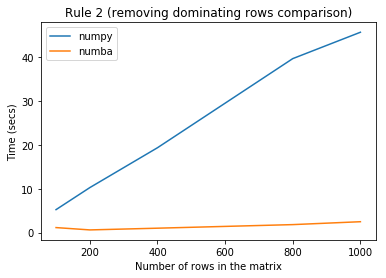

In [122]:
plt.plot(iter_values, np_row, label='numpy')
plt.plot(iter_values, numba_row, label = 'numba')
plt.legend()
plt.xlabel("Number of rows in the matrix")
plt.ylabel("Time (secs)")
plt.title("Rule 2 (removing dominating rows comparison)")
plt.savefig("row.pdf")

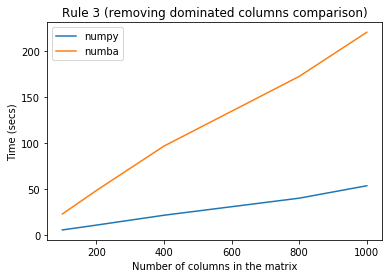

In [124]:
plt.plot(iter_values, np_col, label='numpy')
plt.plot(iter_values,  numba_col, label = 'numba')
plt.legend()
plt.xlabel("Number of columns in the matrix")
plt.ylabel("Time (secs)")
plt.title("Rule 3 (removing dominated columns comparison)")
plt.savefig("col.pdf")

In [ ]:
3824, 589